# Preprocessing
Dataset for loan prediction is given
1. Load the dataset in Python environment
2. Perform different preprocessing steps
* Missing value handling
* Outlier detection
* Encoding
* Scaling
3. Give detailed description for each step

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns

# Load dataset

In [2]:
data = pd.read_csv("/content/sample_data/train_loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Analyse data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Checking duplicates

In [5]:
data.duplicated().sum()

np.int64(0)

# Removing unnecessary columns

In [6]:
data.drop("Loan_ID",axis=1,inplace=True)

# Checking for missing values

In [7]:
data.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Seperating numerical data and categorical data

In [8]:
numcol = data.select_dtypes("number").columns
numcol

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
catcol = data.select_dtypes("object").columns
catcol

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Imputing missing values with mean and mod

In [10]:
for col in numcol:
  data[col].fillna(data[col].mean(),inplace=True)

for col in catcol:
  data[col].fillna(data[col].mode()[0],inplace=True)

/tmp/ipython-input-732860297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(),inplace=True)
/tmp/ipython-input-732860297.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [11]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# Checking for outliers

In [12]:
data.select_dtypes("number").skew()

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.726601
Loan_Amount_Term,-2.389680
Credit_History,-1.963600


<Axes: >

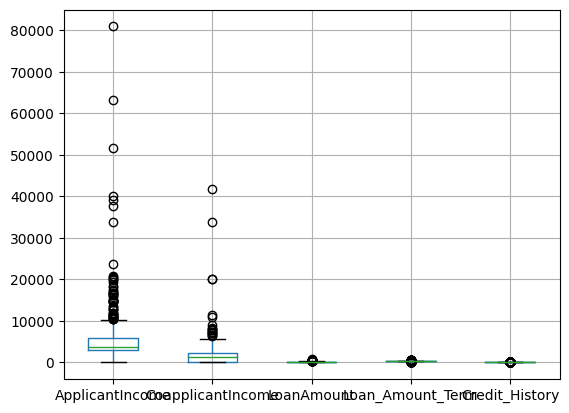

In [13]:
data.boxplot()

Using IQR finding outliers

In [14]:
for col in numcol:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3-Q1

  lower_limit = Q1-1.5*IQR
  upper_limit = Q3+1.5*IQR

  Outliers = data[(data[col]<lower_limit) | (data[col]>upper_limit)]
  print(f"Number of outliers in '{col}': {len(Outliers)}")

Number of outliers in 'ApplicantIncome': 50
Number of outliers in 'CoapplicantIncome': 18
Number of outliers in 'LoanAmount': 41
Number of outliers in 'Loan_Amount_Term': 102
Number of outliers in 'Credit_History': 139


Cap outliers

In [15]:
for col in numcol:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

Identifying categorical columns

In [16]:
for i in catcol:
  print(data[i].value_counts())
  print()

Gender
Male      502
Female    112
Name: count, dtype: int64

Married
Yes    401
No     213
Name: count, dtype: int64

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Loan_Status
Y    422
N    192
Name: count, dtype: int64



# Encoding categorical column

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encodedcatcol = pd.DataFrame(ohe.fit_transform(data[catcol]))
encodedcatcol.columns = ohe.get_feature_names_out()
data = pd.concat([data[numcol].reset_index(drop=True), encodedcatcol], axis=1)
display(data.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Scaling numerical columns

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numcol] = scaler.fit_transform(data[numcol])
display(data.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.497164,-0.874587,0.150494,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.013767,0.054395,-0.179896,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.652632,-0.874587,-1.292433,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-0.820924,0.578025,-0.323449,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.558104,-0.874587,0.053377,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
